### How well do jobs and skills pay for data Analysts?

## Methology

1. Evaluate median salary for top 6 data jobs

2. Find median salary per skill for Data Analysts

3. Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  


# Loading Data
df= pd.read_csv("data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
#filter for the jobs title and country 

df_uk = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])


In [3]:
job_titles =df_uk['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_uk_top6 = df_uk[df_uk['job_title_short'].isin(job_titles)]
df_uk_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1107,Data Scientist,"Data Scientist, Customer AI Engineering","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-20 13:12:50,False,False,United Kingdom,year,157500.0,NaN,Tractable,"[python, numpy, pandas, scikit-learn]","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
9778,Senior Data Analyst,Workday HCM Senior Data Analyst (18 month FTC),"London, UK",via Ai-Jobs.net,Contractor,False,United Kingdom,2023-07-10 13:36:15,True,False,United Kingdom,year,111175.0,NaN,WPP,"[vba, python, r, oracle, sap, excel]","{'analyst_tools': ['sap', 'excel'], 'cloud': [..."
9903,Senior Data Engineer,Senior Satellite Analytics Data Engineer,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-08-10 13:34:53,False,False,United Kingdom,year,147500.0,NaN,Verisk,"[python, sql, nosql, mongodb, mongodb, elastic...","{'cloud': ['aws'], 'databases': ['mongodb', 'e..."
13764,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,109500.0,NaN,Publicis Groupe,"[excel, powerpoint, flow]","{'analyst_tools': ['excel', 'powerpoint'], 'ot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781461,Data Scientist,Data Scientist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-04-04 06:31:10,False,False,United Kingdom,year,88128.0,NaN,Kuda Technologies Ltd,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
783284,Senior Data Scientist,Senior Data Scientist,"Belfast, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-28 06:14:36,False,False,United Kingdom,year,157500.0,NaN,Axiom,"[sql, r, python, aws, redshift, spark, gitlab,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
783436,Data Scientist,Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 06:36:08,True,False,United Kingdom,year,72900.0,NaN,Xiatech,"[html, python, css, javascript, sql, bigquery,...","{'analyst_tools': ['tableau'], 'async': ['jira..."
783598,Data Engineer,Data Engineer,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-02 06:18:42,False,False,United Kingdom,year,96773.0,NaN,Prevail,"[python, java, scala, c#, r, redshift, aws]","{'cloud': ['redshift', 'aws'], 'programming': ..."


In [5]:
job_order = df_uk_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

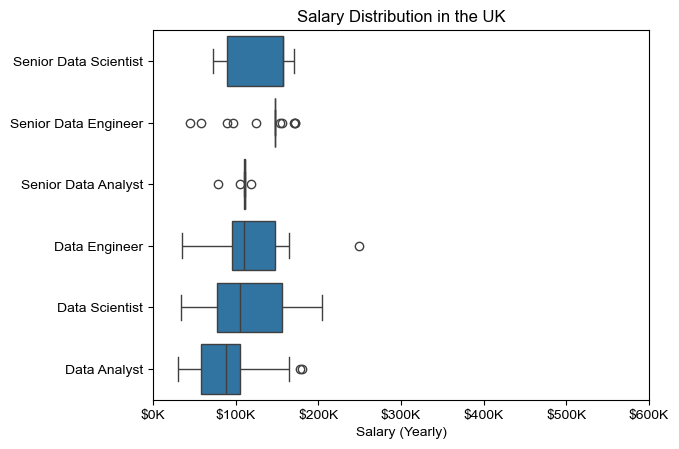

In [6]:
sns.boxplot(data=df_uk_top6, x='salary_year_avg', y='job_title_short', order= job_order)

sns.set_theme(style = 'ticks')


plt.title('Salary Distribution in the UK')
plt.xlabel('Salary (Yearly)')
plt.ylabel('')
plt.xlim(0, 600_000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigating Median Salary Vs Skill for Data Analysts

In [13]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])



In [20]:
df_DA_UK = df_DA_UK.explode('job_skills')

df_DA_UK[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [27]:
df_DA_top_pay = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'median', ascending=False)


df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
pandas,1,177283.0
tensorflow,1,177283.0
numpy,1,177283.0
c++,1,177283.0
pytorch,1,177283.0
aurora,1,165000.0
mongodb,2,165000.0
mysql,3,165000.0
aws,3,165000.0


In [19]:
df_DA_skills = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by= 'median', ascending=False)


df_DA_skills

,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
python,25,89100.0
power bi,7,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


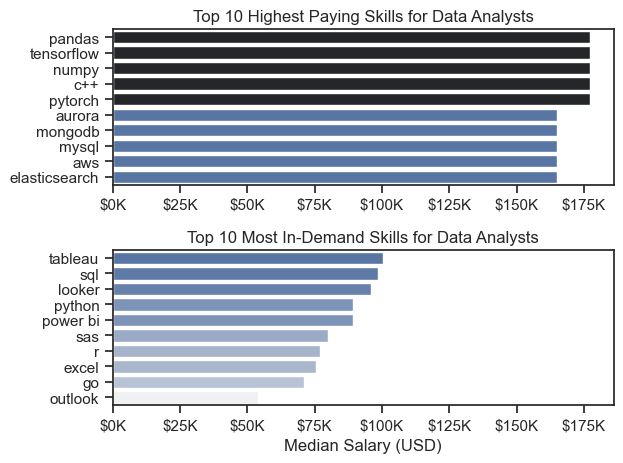

In [30]:
fig, ax =plt.subplots( 2, 1)
sns.set_theme(style= 'ticks')

#Top 10 highest paying skills for Data Analysts

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue ='median', ax = ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    
# Top 10 most in-demand skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue = 'median', ax = ax[1], palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) # Set x-axis limits to be the same as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()



